In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [3]:
dataset_path = ('dataset/')

In [4]:
#Load the images and labels
labels = ['Beagle', 'Labrador_Retriever','Golden_Retriever', 'German_Shepherd', 'Rottweiler', 'Poodle', 'Bulldog', 'Boxer', 'Yorkshire_Terrier', 'Dachshund']
images = []
classes = []

for label in labels:
    for file in os.listdir(dataset_path + label):
        img = Image.open(dataset_path + str(label) + '/' + str(file))
        img = img.resize((64,64))
        arr = np.array(img)
        images.append(arr)
        classes.append(label)

images = np.array(images)
classes = np.array(classes)

In [5]:
classes

array(['Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beag

In [6]:
# Encode the labels
le = LabelEncoder()
classes = le.fit_transform(classes)

In [7]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2, random_state=42)

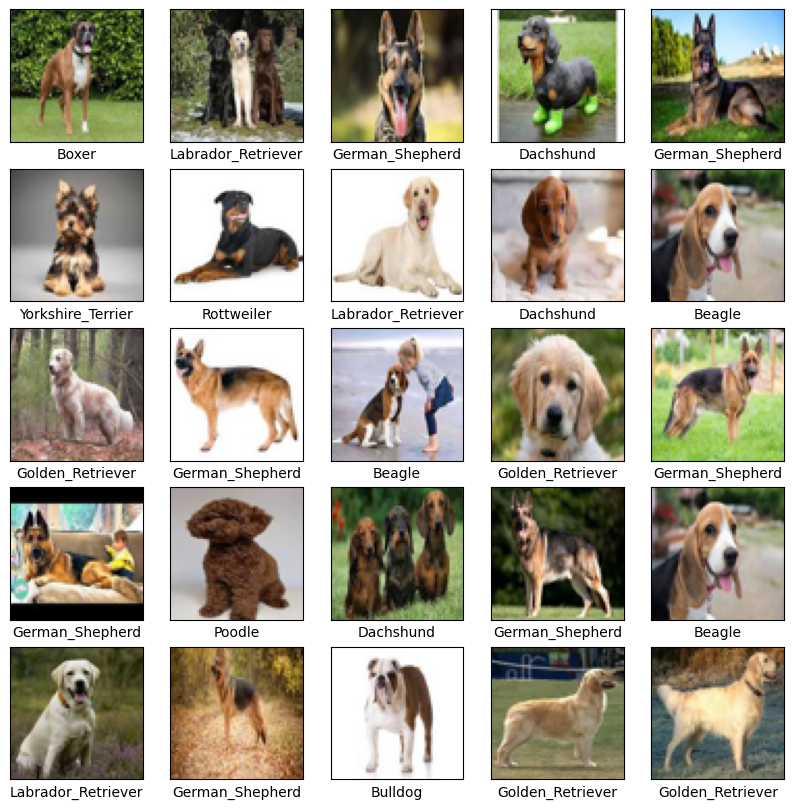

In [8]:
#Visualize some images
def plot_images(images, labels, classes):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i]])
    plt.show()

plot_images(X_train, y_train, le.classes_)

In [9]:
#Neural Network Architecture
model = Sequential([
    Conv2D(8, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(len(labels), activation='softmax')

])

In [10]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0916 - loss: 14.6585 - val_accuracy: 0.0876 - val_loss: 2.5265
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1052 - loss: 2.4021 - val_accuracy: 0.1753 - val_loss: 2.1489
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2035 - loss: 2.1286 - val_accuracy: 0.2938 - val_loss: 1.9601
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3210 - loss: 1.8650 - val_accuracy: 0.3608 - val_loss: 1.7733
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4199 - loss: 1.6437 - val_accuracy: 0.4278 - val_loss: 1.6009
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5274 - loss: 1.4372 - val_accuracy: 0.5206 - val_loss: 1.4565
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5989 - loss: 1.2306 - val_accuracy: 0.5464 - val_loss: 1.3400
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6833 - loss: 1.0600 - val_accuracy: 0.6134 - val_loss

In [12]:
#Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7722 - loss: 0.8824 
Test accuracy: 0.7628865838050842


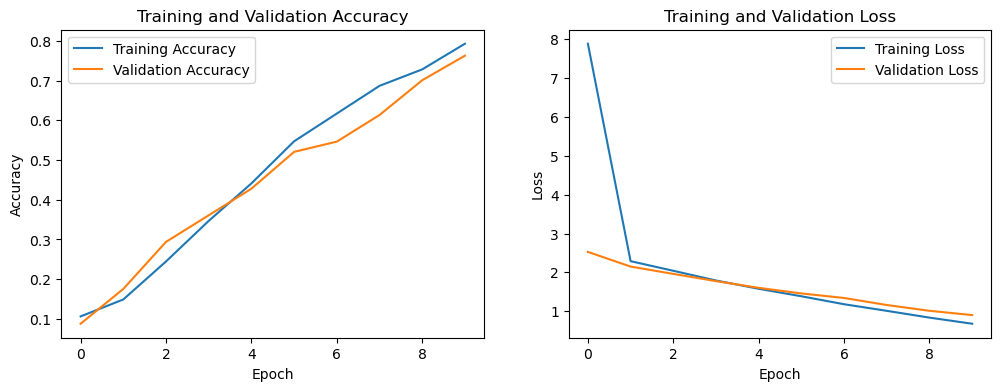

In [13]:
# Visualize training history
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


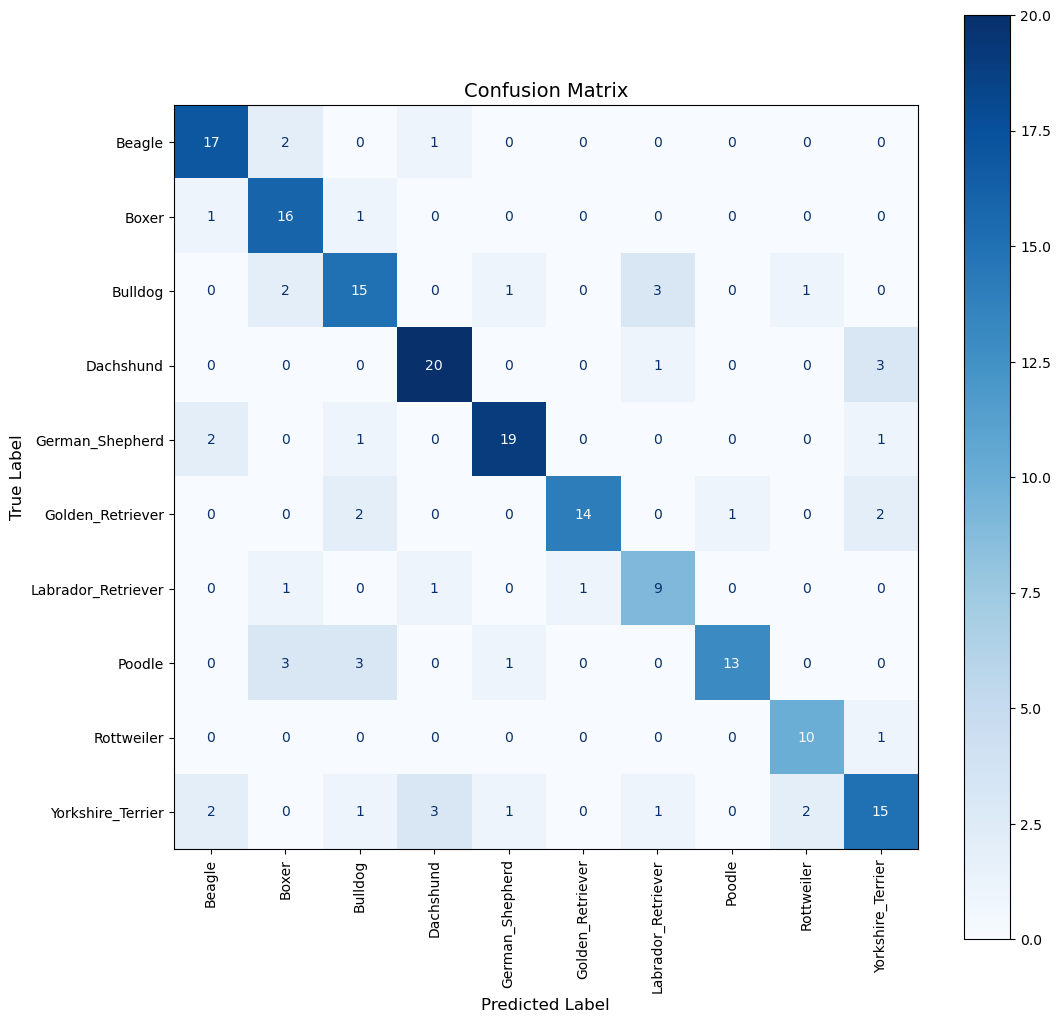

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

#The plot size
plt.figure(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, ax = plt.gca(), xticks_rotation='vertical')


#font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize =12)
plt.ylabel('True Label', fontsize =12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()

# Improving the Model's Performance

In [16]:
# Define the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(len(labels), activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,866 (101.04 KB)

 Trainable params: 25,866 (101.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1180 - loss: 9.7074 - val_accuracy: 0.1598 - val_loss: 2.0902
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3288 - loss: 1.8577 - val_accuracy: 0.3247 - val_loss: 1.9141
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5318 - loss: 1.4393 - val_accuracy: 0.5876 - val_loss: 1.2157
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.8683 - val_accuracy: 0.7732 - val_loss: 0.7415
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8941 - loss: 0.3641 - val_accuracy: 0.9175 - val_loss: 0.3935
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9780 - loss: 0.1367 - val_accuracy: 0.9485 - val_loss: 0.2599
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9907 - loss: 0.0456 - val_accuracy: 0.9330 - val_loss: 0.3323
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9927 - loss: 0.0440 - val_accuracy: 0.9794 - val_loss

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.2160 
Test accuracy: 0.9793814420700073


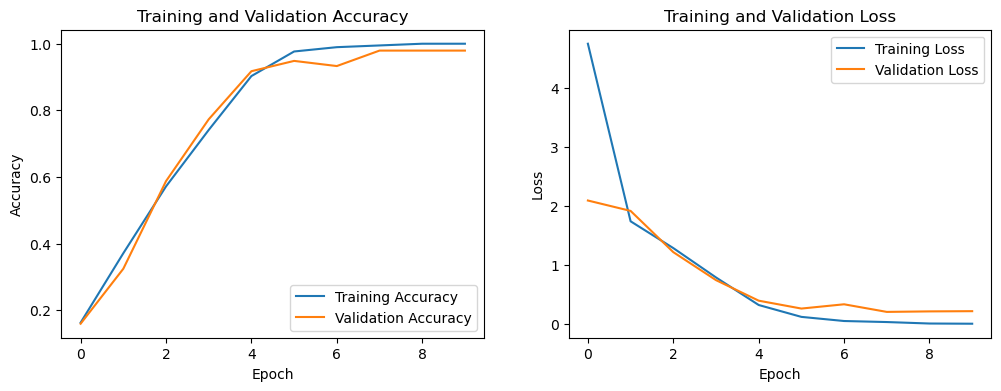

In [41]:
# Visualize training history
plt.figure(figsize=(12,4))

plt.subplot(1, 2 ,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2 ,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


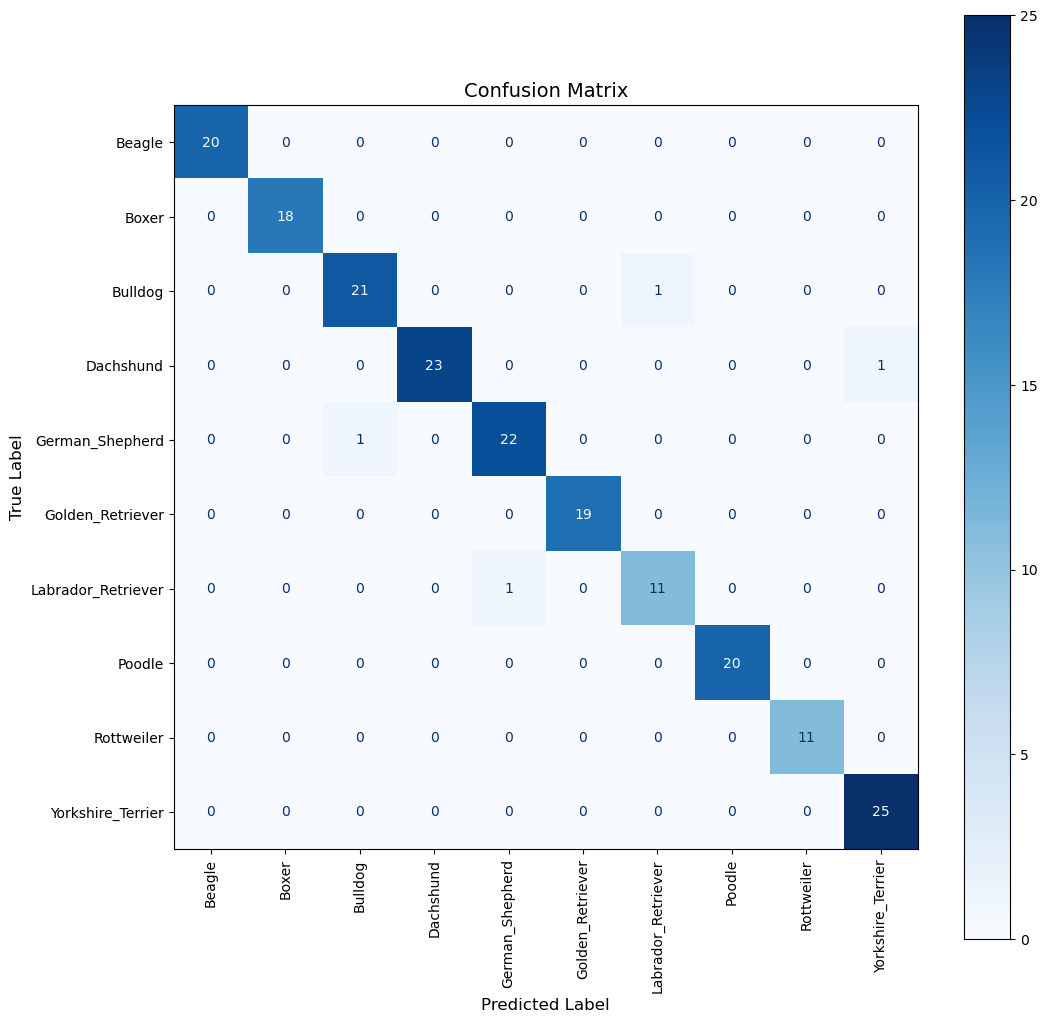

In [43]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# The plot size
plt.figure(figsize=(12,12))
display.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')

# Font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()

In [47]:
model.save("my_model.keras")